# TMA4320 vår 2023 - Biofysikkprosjekt
## Diffusjonsvektet MRI: et bilde av vannmolekylers virrevandring

Casper Lindeman, Gonchigsuren Bor og Stian Mæhre

### 1.Introduksjon
Kreft er en av de største utfordringene i helsevesenet i dag. Med økende befolkningsvekst og aldrende befolkning, er det viktigere enn noen gang å forstå årsakene til og måter å forebygge og behandle kreft på. Vev som inneholder kreft, også kalt for tumorer, kjennetegnes som kjent av ukontrollert deling av celler. Dette medfører blant annet til at tumorer har høyere konsentrasjon av vann i forholdet til normalt vev. Årsaken til det er at kreftsvulster har en dårlig evne til å la vannmolekyler bevege seg fritt mellom de ekstra- og intracellulære rommene. Dette fenomenet kalles for virrevandring (random walk) eller diffusjon. Tumorer har med andre ord lavere diffusjon enn friskt vev. Slike endringer i diffusjon kan oftest bli funnet ved hjelp av magnetisk resonansavbildning (MRI), som tar nytte av de magnetiske egenskapene til vannmolekyler. I dette prosjektet skal vi analysere og modellere virrevandring, og analysere diffusjonen til  simulerte tumorer og finne stedene i vevet med høye kreftcelletetthet ved hjelp av virrevandring.

In [1]:
#biblioteker brukt i oppgaven
%matplotlib inline
import numpy as np              
import matplotlib.pyplot as plt #importerer biblioteket for å plotte grafer
import scipy # Brukes til regresjon
from scipy import optimize
from matplotlib.pyplot import figure #for å lage større plotter

## Oppgave 1: Frie virrevandrere i én og to dimensjoner
Før vi begynner å simulere bevegelsen til virrevandrende vannmolekyler, må vi undersøke hvordan virrevandring fungerer. I oppgave 1 skal vi simulere frie virrevandrere i én og to dimensjoner.

Vi antar at $\varphi$ er sannsynlighetstetthet til virrevandrerne og at $\varphi$ er normalfordelt med forventningsverdi $\mu$ og varians $\sigma^2$: $\varphi \sim N(0, \sigma^2)$.

Fra oppgaveteksten kjenner vi at $\frac{\partial \varphi (x, t)}{\partial t} = D \frac{\partial^2 \varphi (x, t)}{\partial x^2}$, der diffusjonskonstanten $D$ kan approksimeres til $D = \frac{(\Delta x)^2}{2 \Delta t}$.

Siden $\varphi$ er normalfordelt vil den være på denne formen:
\begin{align}
\varphi (x, t) = \frac{1}{\sigma \sqrt{2 \pi}} \exp\left(-\frac{x^2}{2 \sigma^2}\right)
\end{align}
Setter vi inn at $\sigma^2 = at$
\begin{align}
\varphi (x, t) = \frac{1}{\sqrt{2 \pi at}} \exp\left(-\frac{x^2}{2at}\right)
\end{align}

og regner ut de deriverte for å finne hva vi skal sette inn i uttrykkene:

\begin{align}
\frac{\partial \varphi (x, t)}{\partial t} = - \frac{(at - x^2) \exp(-\frac{x^2}{2at})}{2 \sqrt{2 \pi} a^{\frac{3}{2}} t^{\frac{5}{2}}} \\
\frac{\partial^2 \varphi (x, t)}{\partial x^2} = \frac{(x^2 - at) \exp(-\frac{x^2}{2at})}{\sqrt{2 \pi} (at)^{\frac{5}{2}}} 
\end{align}

Så setter vi disse utrykkene inn i den første ligningen.
\begin{align}
\frac{(x^2 - at) \exp(-\frac{x^2}{2at})}{2 \sqrt{2 \pi} a^{\frac{3}{2}} t^{\frac{5}{2}}} = D \frac{(x^2 - at) \exp(-\frac{x^2}{2at})}{\sqrt{2 \pi} (at)^{\frac{5}{2}}} 
\end{align}

Da får vi:
\begin{align}
\frac{1}{2} = \frac{D}{a}
\end{align}

\begin{align}
a = 2D = 2 \frac{(\Delta x)^2}{2 \Delta t} = \frac{(\Delta x)^2}{\Delta t}
\end{align}

Med $\Delta x = 1$ og $\Delta t = 1$:
\begin{align}
a = 1
\end{align}

Det vil si at variansen er lik $at$ hvis $a = 1$

In [2]:
# Oppgave b)

delta_x = 1 #bare for oppgave 1
delta_y = 1 #bare for oppgave 1
delta_t = 1 #bare for oppgave 1
a = (delta_x)**2/(delta_t)

'''''
Funksjonen "virrevandrer_0" simulerer bevegelsen til en virrevandrer i én dimensjon. Funksjonen som tar inn antall 
steg M og p_R (sannsynlighet til å gå til høyre). Funksjonen returnerer to arrayer: en array med posisjoner i det
én-dimensjonale rommet og en annen array med tidssteg.

'''''

def virrevandrer_0(M, p_R):
    posisjon = np.zeros(M) # Lager et array bestående av 0 med lengde til tiddslengden.
    tidssteg = np.linspace(0, M + 1, M) # Lager tidssteg som er jevnt fordelt på området.
    rand_tall = np.random.uniform(0, 1, M - 1) # Lager en liste med uniformt fordelte tilfedlige tall.

    for i in range(1, M):
        if rand_tall[i - 1] < p_R:      # Sjekker om det indekserte tallet er større eller mindre enn p_R. Dette er det tilfeldige valget.
            posisjon[i] = posisjon[i - 1] + delta_x # Legger til delta_x 
        else:
            posisjon[i] = posisjon[i - 1] - delta_x # Trekker fra delta_x
    return posisjon, tidssteg

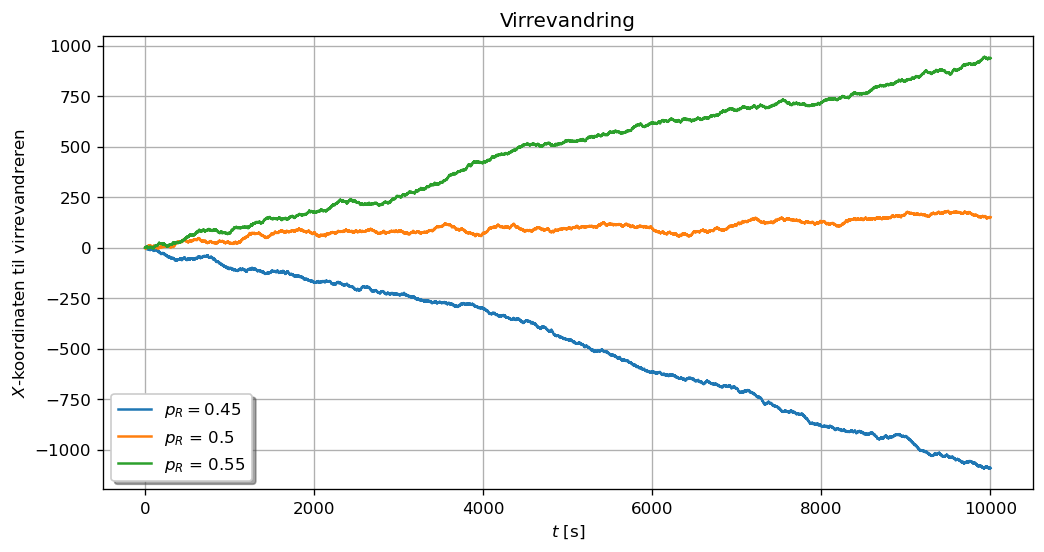

In [3]:
# Oppgave c)

sim1_x, t_1 = virrevandrer_0(10000, 0.45) #p_R = 0.45
sim2_x, t_2 = virrevandrer_0(10000, 0.5) #p_R = 0.5
sim3_x, t_3 = virrevandrer_0(10000, 0.55) #p_R = 0.55
 
plt.figure(figsize=(10, 5), dpi=120) #gjør grafen større
plt.plot(t_1, sim1_x, label=r'$p_R = 0.45$') #plotter grafene med legende, forskjellige farger for ulike tidsteg
plt.plot(t_2, sim2_x, label=r'$p_R$ = 0.5')
plt.plot(t_3, sim3_x, label=r'$p_R$ = 0.55')
plt.xlabel('$t$ [s]')
plt.ylabel(r'$X$-koordinaten til virrevandreren')
plt.legend(loc=3, shadow=True)
plt.grid()
plt.title(r'Virrevandring') #Navnet for grafen
plt.show() 

#### Kommentar til plottet

Figuren over viser 3 virrevandrere med ulike sannsynligheter for hvilken vei de går. Det er plottet for 10 000 tidssteg og det viser en tydlig trend til verdien på sannsynligheten. Det viser også at selv nokså små variasjoner i $p_R$ gir etter 10 000 tidssteg nokså stor spredning i posisjon. Simuleringene blir altså mer representative for verdiene av $p_R$ jo høyere antallet tidssteg.

In [4]:
# Oppgave d)
# Samler N virrevandrere i en matrise
def total_virrevandrer(N, M, p_R):
    x = np.zeros((N, M))    # Lager en NxM matrise.
    t = virrevandrer_0(M, p_R)[1] # Trekker ut tidsstegene fra en simulering
    for i in range(N):     
        x[i] = virrevandrer_0(M, p_R)[0] # Legger til en virrevandrer per gang i løkka.
    
    return x, t

%timeit total_virrevandrer(1000, 1000, 0.5)

772 ms ± 3.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
# Oppgave e)

'''''

Koden under er raskere enn den forrige. Funskjonen "virrevandrer" simulerer N virrevandrere og samler de i en matrise.

'''''

def virrevandrer(M, N, p_R):
    tidssteg = np.linspace(0, M - 1 , M)
    posisjon = np.zeros(M)
    posisjoner = np.zeros((N, M)) #NXM matrise for forskjellige virrevandrere
    
    for i in range(N):
        x_rand = np.random.uniform(0, 1, M-1) #liste med tilfeldige tall. Uniform fordelt
        posisjon = posisjon[:-1]
        posisjon[x_rand < p_R] = delta_x
        posisjon[x_rand > p_R] = -delta_x
        posisjon = np.insert(posisjon,0,0) #virrevandreren skal starte i origo
        posisjoner[i] = np.cumsum(posisjon) #til slutt tar vi den kumulative summen for å få posisjoner
        
    return posisjoner, tidssteg 

%timeit virrevandrer(1000, 1000, 0.5)

64.4 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Kommentar til kodehastighet
Vi ser at koden i denne deloppgaven kjører fortere. Det er fordi det er brukt færre for-løkker og if og else setninger. I tillegg er de to funksjonene fra før samlet i en. Det gjør koden mer kompakt og lettere å kjøre. Dessuten er posisjonen nå et array som er en kumulativ sum av hvert steg. Det letter simuleringen, fordi posisjonsarrayene trenger ikke oppdateres hele tiden. Dette gjør at koden kjører rundt 10 ganger fortere. Det er en rekke ting i den orginale koden som gjør at den ikke bruker unødvendig lang tid. For eksempel er alle arrayene lagd som numpy arrays med en endelig lengde. Dette går mye fortere enn vanlige python-lister med udefinert lengde. En annen ting er å definere alle tidstegene til å begynne med i stedet for å legge til hvert element per iterasjon.

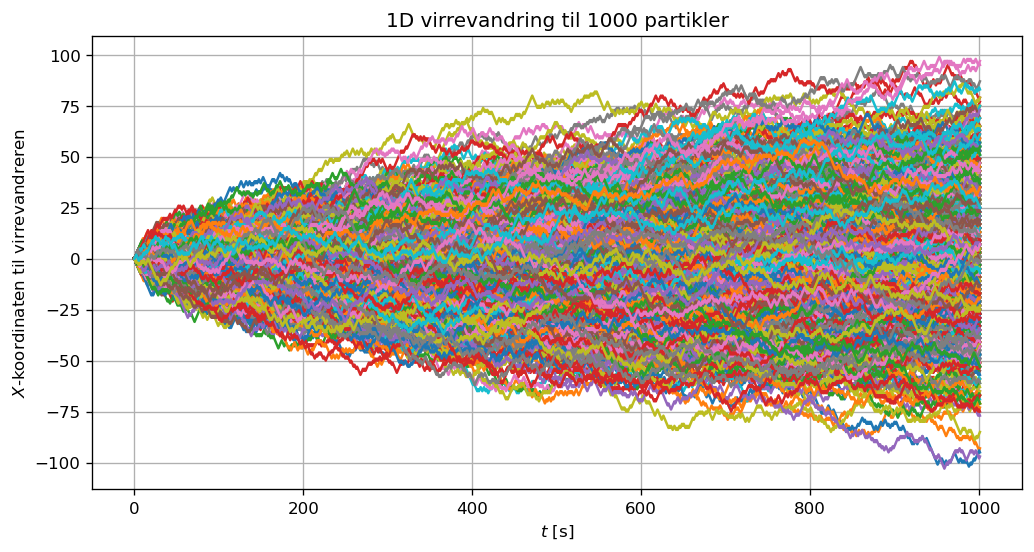

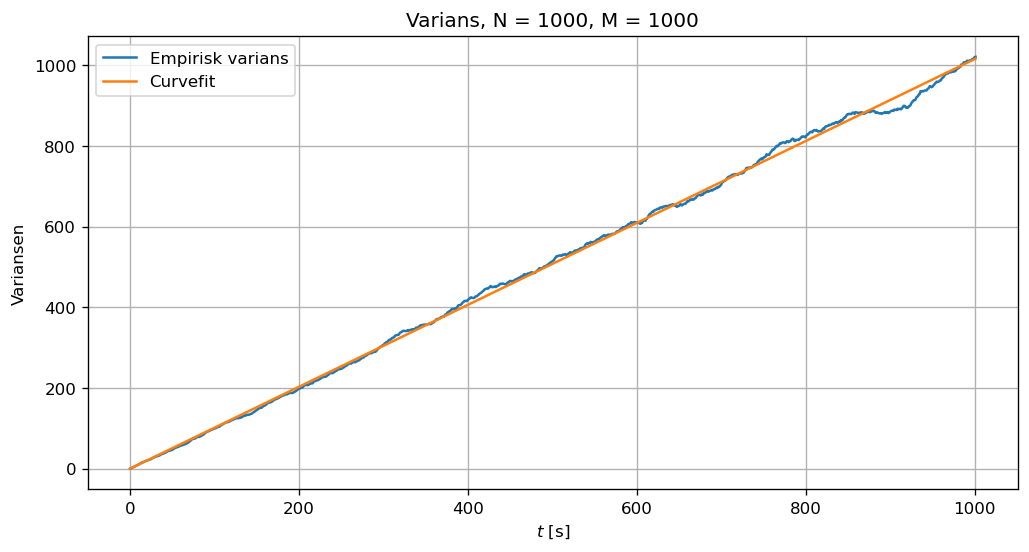

Variansen er målt til 1.014856


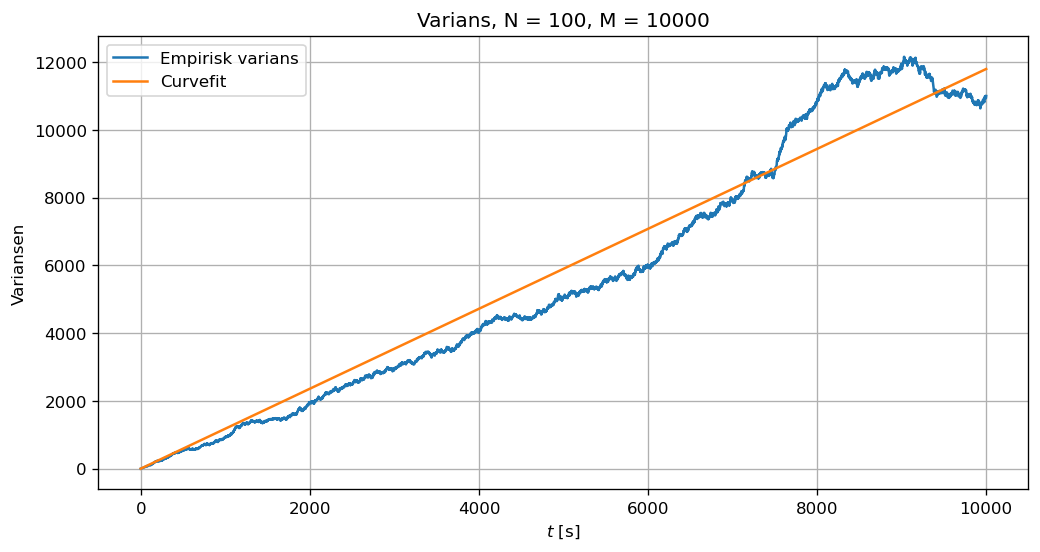

Variansen er målt til 1.179250


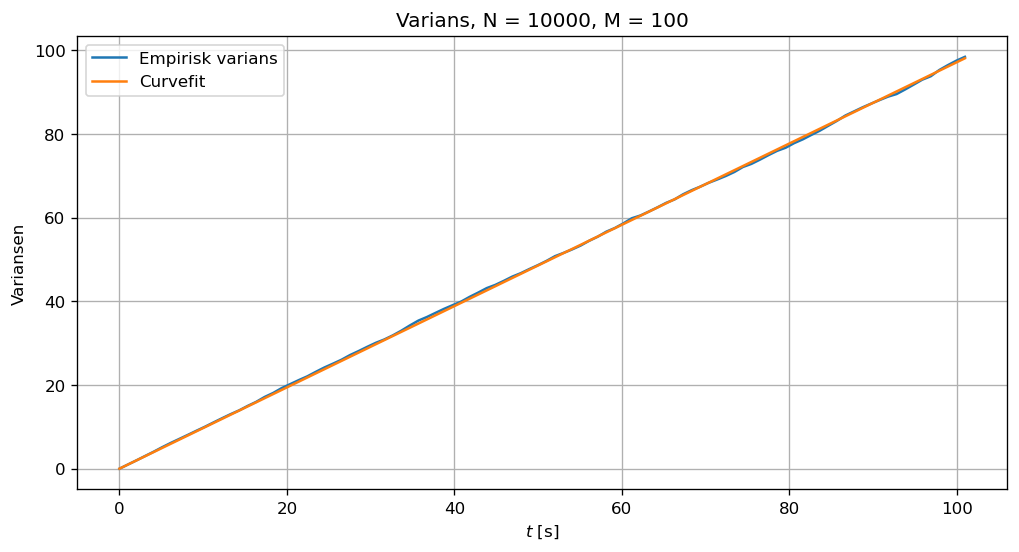

Variansen er målt til 0.971628


In [6]:
# Oppgave f)

'''''

Koden under regner ut den empiriske variansen for N virrevandrere. Vi bruker numpy funksjoner for å få kortere 
kjøretid.

'''''

# Regner ut den empiriske variansen til N virrevandrere i hvert tidssteg.
def empirisk_var(x, t):
    N = len(t)
    varians = np.zeros(N)
    
    for i in range(N):
        varians[i] = np.var(x[:,i]) #tar inn i-te kolonnevektoren av MxN-matrisen med virrevandringen
    return varians

# Plotter psisjon til N virrevandrere som funskjon av tid.
def plot_virrevandrer(N, M, p_R):
    plt.figure(figsize=(10, 5), dpi=120)
    plt.title(f'1D virrevandring til {N} partikler')
    posisjon, tid = total_virrevandrer(N, M, p_R)
    for i in range(N):
        plt.plot(tid, posisjon[i])
    plt.xlabel('$t$ [s]')
    plt.ylabel(r'$X$-koordinaten til virrevandreren')
    plt.grid()
    plt.show()

plot_virrevandrer(1000, 1000, 0.5)

# Den forventa formen på variansen gitt ved:
def linear(tid, a):
    return a*tid  # Fra oppgave a)

# Funksjon som plotter den empiriske variansen og regresjonen av den,
# med N virrevandrere, M tidssteg og sannsynlighet for å gå til høyre som
# input.
def regresjon_av_varians(N, M, p_R):
    posisjon, tid = total_virrevandrer(N, M, p_R)
    emp_varians = empirisk_var(posisjon, tid)
    tilpasning = scipy.optimize.curve_fit(linear, tid, emp_varians) # Returnerer koefesientene i den forventa funskjonsformen.
    plt.figure(figsize=(10, 5), dpi=120) #gjør grafen større
    plt.plot(tid, emp_varians, label = f'Empirisk varians') #Plotter grafene med legende, forskjellige farger for ulike tidsteg
    plt.plot(tid, linear(tid, tilpasning[0][0]), label = f'Curvefit') #Plotter regresjonen
    plt.xlabel('$t$ [s]')
    plt.ylabel(r'Variansen')
    plt.legend()
    plt.grid()
    plt.title(f'Varians, N = {N}, M = {M}') #Navnet for grafen
    plt.show() 

    print(f'Variansen er målt til {tilpasning[0][0]:.6f}')

regresjon_av_varians(1000, 1000, 0.5)
regresjon_av_varians(100, 10000, 0.5)
regresjon_av_varians(10000, 100, 0.5)

#### Kommentar til varians
Plott nummer 1 er av 1000 partiklers virrevandring og viser hvordan virrevandrerende sprer seg utover fra origo. Hovedtyngden av partiklene ligger fremdeles i origo og henger sammen med at det er lik sannsynlighet for økende x-verdi som synkende x-verdi.

Plott nummer 2 er av den empiriske variansen og viser hvor stor spredning det er i dataene på ved hvert tidssteg. Stigningstallet til grafen, som representerer variansen, ligger nokså nære 1, men treffer ikke helt. 

Plott nummer 3 viser variansen til 100 partikler med 10 000 tidssteg. Selve tallet for stigningen er ikke veldig langt unna den analytiske verdien, men spredningen i verdier er mye større. Det kommer til utrykk ved at den empiriske variansen er veldig "hakkete" og svært sjelden ligger på regresjonslinja.

Plott nummer 4 viser variansen til 10 000 partikler med 100 tidssteg. Stigningstallet legger også her seg til rundt 1 som det analytiske, men til forskjell fra de andre ligger den empiriske variansen mye nærmere regresjonen. Det viser at flere antall partikler, økende N, konvergerer mot den analytiske løsningen. Grunnen til dette er at mange antall tilfedlige partikler gjør at normalfordelingen blir mer og mer relevant. Antall tidssteg vil ikke hjelpe, fordi hvert unntak vektes i mye større grad.

<Figure size 432x288 with 0 Axes>

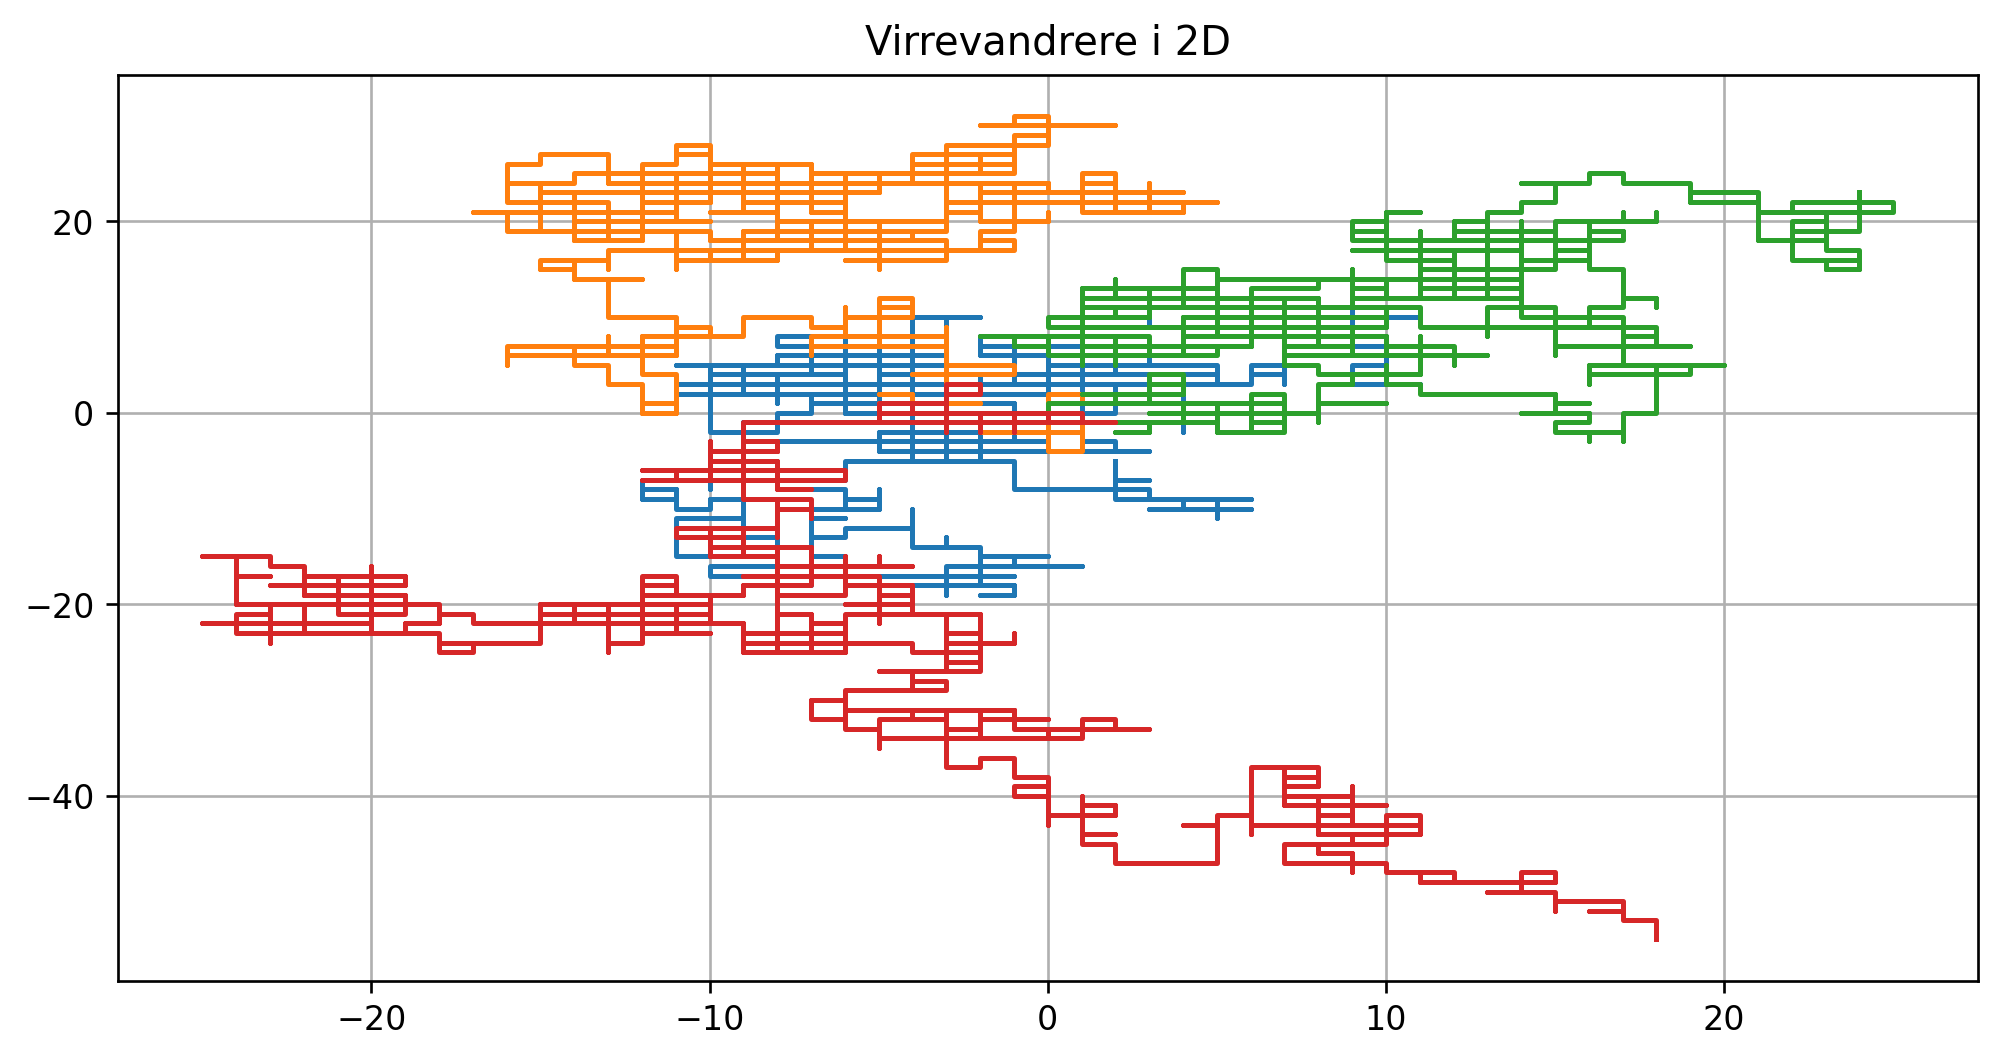

Dette plottet er isotropt og har 1000 tiddsteg og 4 virrevandrere.


<Figure size 432x288 with 0 Axes>

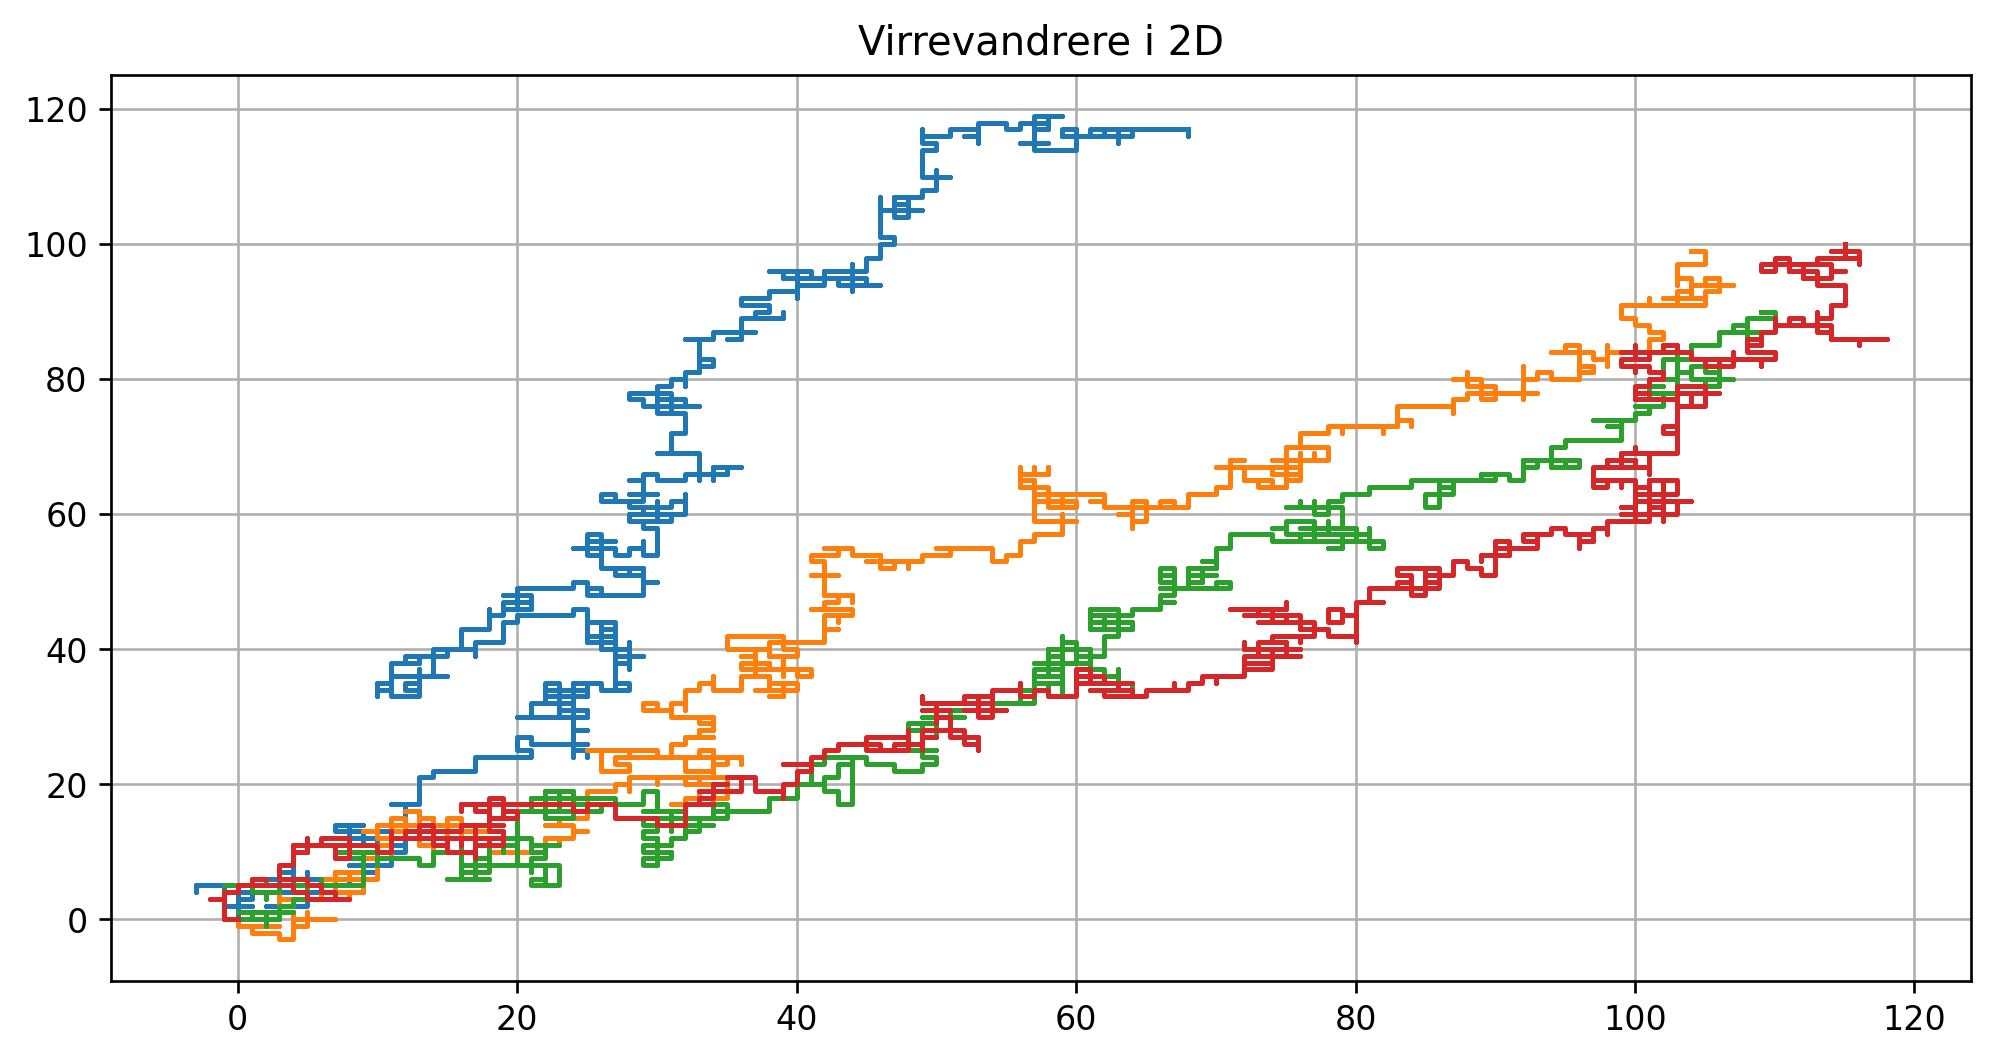

Dette plottet er anisotropt og har 1000 tiddsteg og 4 virrevandrere.


<Figure size 432x288 with 0 Axes>

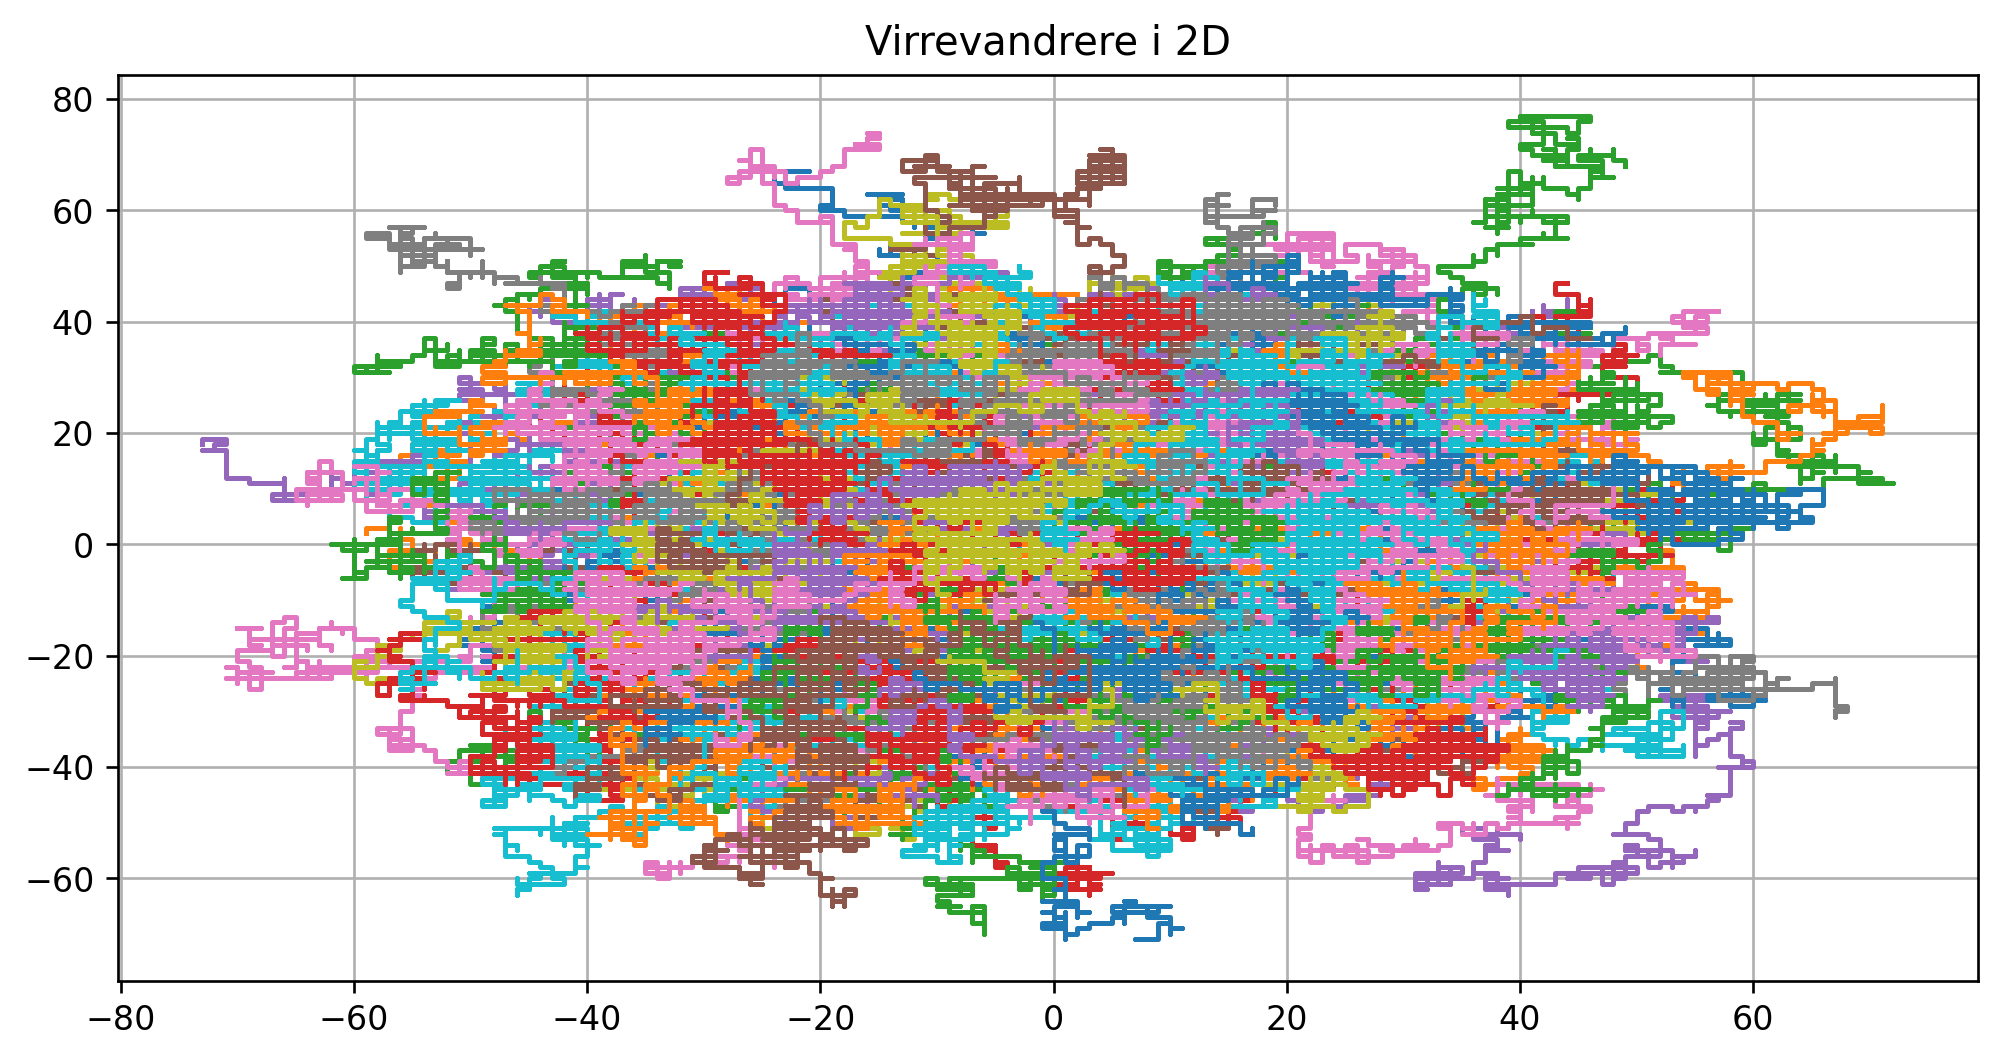

Dette plottet er isotropt og har 1000 tidssteg og 1000 virrevanrere.


In [7]:
# Oppgave g)

'''''

Koden "virrevandrer_2D" simulerer bevegelsen til en virrevandrer i to dimensjoner. Vi bestemte oss å ta avstand fra
den oppgitte algoritmen (Algoritme 1 i prosjektheftet). Vi tar nå utgangspunkt i den raskere koden fra oppgave e) og
endrer den slik at den kan kjøre i to dimensjoner.

'''''
def virrevandrer_2D(M, p_R, p_U):
    x, y = np.zeros(M - 1), np.zeros(M - 1) # Lager 2 lister med 0 elementer med lengde til tidsstegene.
    x_rand, y_rand = np.random.uniform(0, 1, M - 1), np.random.uniform(0, 1, M - 1) # Lager 2 lister med uniform fordelte tilfeldige tall mellom 0 og 1
    derailer = np.random.randint(0, 2, M-1) # Lager en liste med enten 0, 1 med lengde til tidsstegene. brukes til å bestemme om virrevanderen beveger
                                            # seg horisontalt eller vertikalt
    
    x[x_rand > p_R] = - delta_x             # Sjekker om alle elementer i den tilfedlige lista er høyere enn sannsynligheten og legger til delta x hvis det stemmer.
    x[x_rand < p_R] = delta_x               # Sjekker om alle elementer i den tilfedlige lista er høyere enn sannsynligheten og trekker fra delta x hvis det stemmer.
    y[y_rand > p_U] = - delta_x             # Sjekker om alle elementer i den tilfedlige lista er høyere enn sannsynligheten og legger til delta x hvis det stemmer.
    y[y_rand < p_U] = delta_x               # Sjekker om alle elementer i den tilfedlige lista er høyere enn sannsynligheten og trekker fra delta x hvis det stemmer.
    
    x[derailer == 0] = 0                    # Sjekker verdien til elementet i lista med {0, 1} og setter x-verdien til 0 hvis dette tallet er 0
    y[derailer == 1] = 0                    # Sjekker verdien til elementet i lista med {0, 1} og setter y-verdien til 0 hvis dette tallet er 1
    
    return np.cumsum(np.insert(x, 0, 0)), np.cumsum(np.insert(y, 0, 0))  # Finne den kumulative summen med utgangspunkt.

# Samler N virrevandrere i en matrise:
def total_virrevandrer_2D(M, N, p_R, p_U):
    tensor = np.zeros((N, 2, M))
    for i in range(N):
        x, y = virrevandrer_2D(M, p_R, p_U)
        tensor[i][0] = x
        tensor[i][1] = y
    
    return tensor

# Plotter virrevandrere i 2D:
def plot_virrevandring2D(tensor):
    plt. figure(200)
    figure(figsize=(10, 5), dpi=240) 
    for i in range(len(tensor)):
        plt.plot(tensor[i][0], tensor[i][1])
    plt.title("Virrevandrere i 2D")
    plt.grid()
    plt.show()

plot_virrevandring2D(total_virrevandrer_2D(1000, 4, 0.5, 0.5))
print("Dette plottet er isotropt og har 1000 tiddsteg og 4 virrevandrere.")
plot_virrevandring2D(total_virrevandrer_2D(1000, 4, 0.6, 0.6))
print("Dette plottet er anisotropt og har 1000 tiddsteg og 4 virrevandrere.")
plot_virrevandring2D(total_virrevandrer_2D(1000, 1000, 0.5, 0.5))
print("Dette plottet er isotropt og har 1000 tidssteg og 1000 virrevanrere.")

#### Kommentar til 2D virrevandrere
Det er tydlig å se forskjell på de 2 plottene. Fra 1D ble det observert at små forskjeller i sannsynlighet gir nokså stort utslag, det samme skjer her. Det første plottet har virrevandrere i alle kvadranter, om noe litt ujevnt. Likevelt er massesenteret til sannsynlighetsmassen nokså nære origo, selv det spres noe utover. Dette er isotropien i plottet og det blir mer tydelig med flere partikler. I det andre plottet der det er litt høyere sannsynlighet for å gå mot høyre og oppover er nesten all vekten i 1 kvadrant. Dette er anisotropien i systemet.. Virrevandrere ligger jevnt rundt en tenkte linje y = x. Dette er fordi $p_R = p_U$.

In [8]:
#Oppgave h)

'''''

Koden under beregner n(t) for en simulering med N virrevandrere og M tidssteg.

'''''

# Sjekker om 0 er et element i lista over punkter til hver partikkel.
def n(posisjoner):
    tid = len(posisjoner[0])
    antall = np.zeros(tid)
    for j in range(len(posisjoner)):
        x_posisjoner = posisjoner[j] # Henter ut en virrevandrer av gangen.
        for i in range(tid - 1):     # Finner første elementet som er 0.
            if x_posisjoner[i + 1] == 0: 
                antall[i + 1:] += 1  # Legger til 1 på alle verdier etter denne indeksen i lista.
                break                # Sørger for å legge til hver partikkel bare 1 gang.
    return antall/len(posisjoner)    # Returnerer en normalisert liste med andel per tidssteg.

# Plotter andel partikler som har vært innom origo minst 1 gang.
def plot_n(posisjoner, tid):
    plt.figure(62)
    plt.title("Andel partikler som har vært innom origo minst 1 gang, 1D")
    plt.plot(tid, n(posisjoner))
    plt.xlabel("tidssteg [s]")
    plt.ylabel("Andel")
    plt.grid()
    plt.show()

# Sjekker om (0,0) er et element i lista over punkter til hver partikkel.
# Omtrent helt lik metode som den for 1D.
def n2D(tensor):
    tid = len(tensor[0][0])
    antall = np.zeros(tid)
    for j in range(len(tensor)):
        x_posisjoner = tensor[j][0]
        y_posisjoner = tensor[j][1]
        for i in range(tid - 1):
            if x_posisjoner[i + 1] == 0 and y_posisjoner[i + 1] == 0: # Sjekker om både x og y er lik 0 samtidig.
                antall[i + 1:] += 1 
                break
    return antall/len(tensor)

def plot_2Dn(tensor):
    tids_verdier = np.linspace(0, len(tensor[0][0]), len(tensor[0][0]))
    plt.figure(59)
    plt.title("Andel partikler som har vært innom origo minst 1 gang, 2D")
    plt.plot(tids_verdier, n2D(tensor))
    plt.xlabel("tidssteg [s]")
    plt.ylabel("Andel")
    plt.grid()
    plt.show()

#### Analytisk løsning sannsynlighet for at virrevandreren befinner seg i origo i første og andre tidssteg

##### 1D:
$P(x = 0, t = 1) = 0$ fordi en virrevandrer må enten bevege seg til $x = -1$ eller $x = 1$ på det første tidssteget ettersom den ikke kan stå i ro.

$P(x = 0, t = 2)$: Ved $t = 2$ så er virrevandreren i enten  $x = -1$ eller $x = 1$ og den kan bevege seg til $x = -2, x = 0, x = 2$. For å komme til $x = -2$ må virrevandreren flytte mot negativ x-verdi i både $t = 1$ og $t = 2$, samme for $x = 2$. Mens for $x = 0$ er det 2 muligheter ved $t = 1$ ved å flytte i enten positiv eller negativ retning.
\begin{align}
P(x = 0, t = 2) = \frac{g}{m} = \frac{2}{4} = 0.5
\end{align}

##### 2D:
$P(x = 0, t = 1) = 0$ fordi en virrevandrer må bevege seg på det første tidssteget og kan derfor ikke havne på samme sted som den starta.

$P(x = 0, t = 2)$: Ved $t = 1$ så er virrevandreren i en av de 4 heltallige punktene rundt origo. Ved neste tidssteg er det 1 av 4 muligheter og flytte tilbake til det punktet den kom fra. Det samme gjelder for alle 4 retninger. Matematisk blir da sannsynligheten:
\begin{align}
P(x = 0, t = 2) = \frac{1}{4}*\frac{1}{4}*4 = \frac{1}{4} = 0.25
\end{align}

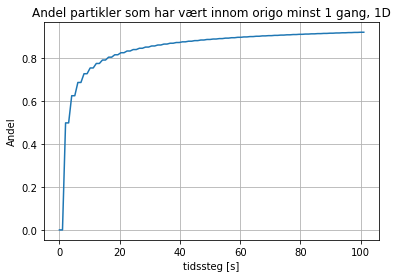

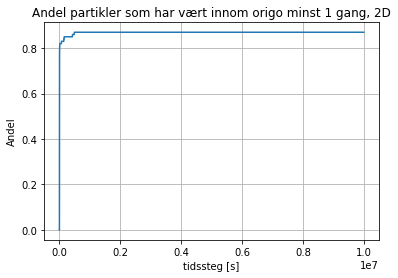

In [9]:
plot_n(total_virrevandrer(100000, 100, 0.5)[0], total_virrevandrer(100000, 100, 0.5)[1])

tensor = total_virrevandrer_2D(10000000, 100, 0.5, 0.5)
plot_2Dn(tensor)

#### Kommentar til plot av $n(t)$
Plottene viser at virrevanderene bruker lang tid før alle har vært innom 0. Med 100 virrevandrere og 100 000 tidssteg for man tilnærmet 1 i 1D, mens det trengs flere tidssteg i 2D. Her vil grafen nærme seg 1 ved høyere tidssteg og antall partikler gir bare glattheten til funksjonen. Så for å spare kjøretid er det her plottet for mange flere tidssteg enn virrevandrer for å få en fornuftig kjøretid. Her er det plottet for 100 virrevandrere med 10 000 000 tidssteg.

## Oppgave 2: Diffusjon av vannmolekyler i hjernen
I oppgave 2 ser vi nærmere på hvordan virrevandrende vannmolekyler diffunderer i friskt vev og tumorer. Vi lager tilfeldige tumorer, og lar virrevandreren diffundere gjennom friske og ondartede celler. Vi bruker den oppgitte intensitetsfunksjonen for å finne hvilke ruter vannmolekylene har oppholdt seg mest i. Til slutt anvender vi et såkalt Sobel-filter og sammenligner det med plottet med intensiteten til bevegelsen av virrevandreren.

I denne oppgaven bruker vi forskjellige fysiske enheter enn de brukt i oppgave 1. Grunnet det måtte vi finne en hensiktsmessig måte å inkludere $Δx$ og $Δt$ på. I det tilfellet bestemte vi at det var best å lagre de fysiske enhetene som en global variable i starten av oppgaven. En fordel med det er at ved endring av de fysiske enhetene, endres også alle verdiene som returneres av alle funksjonene under. $Δx$ er i hele oppgaven gitt i millimeter, men dersom det ønskes, kan enhetene også endres i kodesnittet under. Da endres enehetene automatisk i alle kodene. 

In [10]:
#Oppgave a)

dx = 0.004 #mm
dx_enhet = "mm"
dt = 0.01 #s
dt_enhet = "s"

Gitt $Δx$ og $Δt$, kan vi nå finne diffsusjonskonstanten D. Med den oppgitte ligningen (6)

\begin{align}
D =\frac{(\Delta x)^2}{2 \Delta t}
\end{align}
finner vi at 


\begin{align}
D =\frac{(0.004 mm)^2}{2 \cdot 0.01 s} = 0.0008 \frac{mm^2}{s}
\end{align}


In [11]:
#Oppgave b)

'''''

Funksjonen "tumorceller" tar inn en array med x- og y-koordinater, arealet til tumorene, og posisjonene til tumorene.
I tillegg til det tar funksjonen vår inn en array med tumorkoeffisientene. Koden kan altså funke med ulike 
tumorkoeffisienter, så lenge tumorkoeffisientene ligger i en array-liste. 

Til slutt returner funksjonen kvadratroten av produktet til tumorkoeffisientene som er aktuelle, og ganger 
matrisen med Δx. 
Sluttresultatet er da en matrise som inneholder den effektive Δx i alle koordinatene innenfor området som skal 
undersøkes. 

'''''

def tumorceller(x_koord, y_koord, areal_tumor, posisjon_tumorer, t_k): 
    N = len(x_koord) 
    r = np.sqrt(areal_tumor/np.pi) #finner radiusen til tumorene. Her antar vi sirkulære kreftceller
    farter = np.ones((N,N)) #lager en NxN matrise med N-antall enere
    x_grid, y_grid = np.meshgrid(x_koord,y_koord) #lager et koordinatsystem 
    
    for i, pos in enumerate(posisjon_tumorer):
        farter = np.where(np.sqrt(((x_grid-pos[0])**2 +(y_grid-pos[1])**2)) <= r, farter*t_k[i], farter)
        #finner punktene som kreftcellene treffer, og ganger de punktene med t_k.
        #vi velger sirkulær form på tumorene
        
    return np.sqrt(farter)*dx #funksjonen returnerer en MxM matrise med effektiv Δx

In [12]:
#Oppgave c

'''''

For å kunne plotte bevegelsen til virrevandreren i 2D, endrer vi koden fra oppgave 1g) (virrevandrer i 2 dimensjoner).
Siden vi bare er interessert i retningen av bevegelsen til virrevandreren endrer vi den nest siste linjen i koden, slik
at koden ikke lenger returnerer den kumulative summen av arrayen (posisjonen til virrevandreren). 
Den 3 dimensjonale matrisen (tensor) som vi da får, består dermed av en sekvens av bare -1ere, 0ere og 1ere. 

'''''

def virrevandrer_retning(M,N,p_R,p_U): #M = antall tidssteg (heltall), N = antall virrevandrere (heltall)
    x, y = np.zeros(M-1),np.zeros(M-1)
    tensor = np.zeros((N, 2, M)) 
    
    for i in range(N):
        x_rand, y_rand = np.random.uniform(0, 1, M-1), np.random.uniform(0, 1, M-1)
        derailer = np.random.randint(0,2,M-1)
        
        x[x_rand > p_R] = -1
        x[x_rand < p_R] = 1
        y[y_rand > p_U] = -1
        y[y_rand < p_U] = 1
    
        x[derailer==0] = 0
        y[derailer==1] = 0
        
        tensor[i] = np.insert(x,0,0),np.insert(y,0,0) #her ble np.cumsum() fjernet. 
        
    return tensor

In [13]:
'''''

Koden under simulerer bevegelsen til virrevandreren inni vev med kreftceller. Funksjonen "virrevandrer_bevegelse"
tar inn antall tidssteg (M=heltall), en array med x_aksen, antall virrevandrere (N=heltall) og returnerer en 
3D-matrise som inneholder data om bevegelsen til alle virrevandrere. Merk at vi ikke har noen grensebetingelser for
bevegelsen til virrevandreren i denne koden.

'''''

def virrevandrer_bevegelse(M, x_koord, N, kart_tumorer):
    tensor = virrevandrer_retning(M, N, 0.5, 0.5) #setter p_R=0.5 og p_U=0.5 --> isotrop bevegelse
    x1,y1 = np.meshgrid(x_koord,x_koord) #lager et koordinatsystem, antar at x_koord = y_koord
    
    for virrevandrer in tensor:
        #Her starter alle virrevandrere i [0,0], men i senere kode blir dette endret
        for tid in range(1, M):
            #Lager en NxN matrise med avstanden fra virrevandrerens nåværende koordinat til alle punkter i koordinatsystemet
            r = (x1 - virrevandrer[0][tid - 1])**2 + (y1 - virrevandrer[1][tid - 1])**2
            fart = np.where(r==np.min(r)) #Finner indexen til nærmeste punktet i koordinatsystemet
            fart = kart_tumorer[fart[0][0]][fart[1][0]] #Henter ut effektive Δx som korresponderer tilindexen som er funnet
            
            #Flytter virrevandreren i en tilfeldig utvalgt retning med effektive Δx som er bestemt ovenfor
            virrevandrer[0][tid] = fart * virrevandrer[0][tid] + virrevandrer[0][tid - 1]
            virrevandrer[1][tid] = fart * virrevandrer[1][tid] + virrevandrer[1][tid - 1]

    return tensor #funksjonen returnerer en 3D-matrise, med alle posisjonene til alle virrevandrerne


def plot_virrevandring2D(x_koord, y_koord, tensor, kart_tumorer): #funksjon som lager plottene
    fig, ax = plt.subplots(figsize=(7,7))
    ax.pcolormesh(x_koord, y_koord ,kart_tumorer,shading='auto',cmap='bone')
    fig.suptitle('Bevegelse til virrevandrere i tumorceller', fontsize=16)
    
    #vi har flere virrevandrere. Lager en for løkke og plotter hver virrevandrer i samme plot
    for i in range(len(tensor)): 
        plt.plot(tensor[i][0], tensor[i][1]) 
    
    fig.text(0.5, 0.05, f'Posisjon i x-retningen gitt i [{dx_enhet}]', ha='center', va='center') #aksenavn
    fig.text(0.0, 0.5, f'Posisjon i y-retningen gitt i [{dx_enhet}]', ha='center', va='center', rotation='vertical')
    plt.grid() 
    plt.show()

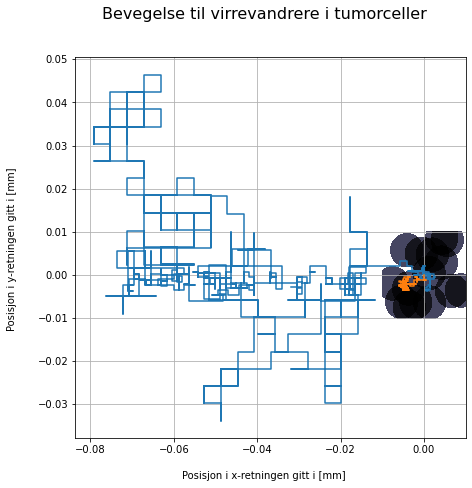

In [28]:
M = 1000 #antall tidssteg
N = 2 #antall virrevandrere
m = 15 # Antall tumorer
L = 0.02 #mm
areal_tumor = np.pi * dx ** 2 #areal til sirkulære tumorer
x_koord = np.linspace(-L/2, L/2, M) 
y_koord = np.linspace(-L/2, L/2, M)

#velger et tilfeldig punkt i arraysene med x- og y-koordinater. Dette gjøres m-ganger, der m er antall tumorer:
posisjon_tumorer = [np.array([np.random.choice(x_koord), np.random.choice(y_koord)]) for i in range(m)]
#array med tumorkoeffisienter:
t_k = np.ones(m)*0.1

#kaller funksjonene:
tumorer_kart = tumorceller(x_koord, y_koord, areal_tumor, posisjon_tumorer, t_k) #lager kreftceller

#setter virrevandreren inn i vevet som inneholder tumorceller
posisjon_virrevandrer = virrevandrer_bevegelse(M, x_koord, N, tumorer_kart)
                                                          
#plotter
plot_virrevandring2D(x_koord, y_koord, posisjon_virrevandrer,tumorer_kart) #plotter

Fra plottet over ser vi at virrevandrene beveger seg raskt i friske celler (markert i hvit), mens i vev som inneholder kreftceller, beveger seg virrevandreren saktere. Vi kan spesielt legge merke til at virrevandreren flytter seg ekstremt sakte i områder der to eller flere kreftceller overlapper.  

I tillegg til det er det en viss sannsynlighet at virrevandreren kan havne utenfor vevet som vi skulle undersøke. Hvis en virrevandrer befinner seg utenfor området der effektiv $Δx$ er bestemt, vil steglenden fortsatt bli bestemt ved å finne det nærmeste koordinatet innenfor vårt definerte område, og bruke den tilhørende steglengden.

I videre deler av oppgaven skal vi simulere med grensebetingelser.

Det er tre teoretisk mulige grensebetingelser som vi kan implementere i koden som simulerer bevegelsen til virrevandreren. Disse er periodiske grensebetingelser, harde vegger og ingen grensebetingelser. Vi bestemte oss for å implementere harde vegger i koden vår. Grunnen til det er at dette virker til å være nærmest den fysiske verden. På et avgrenset område som er mye større enn størrelsen på virrevandrene, vil det til enhver tid være omtrent like mange vannmolekyler tilsammen. Med harde vegger gjør man at ingen av virrevandrene slipper ut og antallet forblir konstant. I virkeligheten ville det gått like mange virrevandrere ut av bilde som inn. Ulempen med denne grensebetingelsen er at den er tyngere for koden å kjøre enn at virrevandren kan bevege seg helt fritt.

I tillegg til det implementerer vi nå i funksjonen vår at startpunktet til virrevandreren kan starte i et punkt ulikt $(0,0)$. Etter vår mening er det mer representativt å ha virrevandreren til å starte bevegelsen sin i et tilfeldig punkt i koordinatsystemet. Dette er spesielt viktig i videre deler av oppgaven, der vi finner intensiteten til virrevandrerbevegelsen. Dersom virrevandreren hadde startet i origo, ville det anslå høy intensitet i origo, noe som kunne føre til mistolking av intensiteten i plottingen. 

In [15]:
#Oppgave d)

'''''

Koden "virrevandrer_bevegelse_med_grensebetingelser" er kjører med samme logikk som i oppgave c). Forskjellen i 
oppgave d) er at vi har implementert grensebetingelsene. 

'''''

def virrevandrer_bevegelse_med_grensebetingelser(M,x_koord,N,kart_tumorer):
    start = x_koord[0]
    slutt = x_koord[-1]
    tensor = virrevandrer_retning(M, N, 0.5, 0.5)
    x1,y1 = np.meshgrid(x_koord,x_koord)
    
    #Vi har flere virrevandrere i samme matrise. For-løkka itererer for hver virrevandrer
    for virrevandrer in tensor:
        x0, y0 = np.random.choice(x_koord), np.random.choice(x_koord)
        virrevandrer[0][0]= x0 #--> endrer startposisjonen, nå starter virrevandrere ikke i origo
        virrevandrer[1][0]= y0 
        
        for tid in range(1, M):
            
            r = (x1 - virrevandrer[0][tid - 1])**2 + (y1 - virrevandrer[1][tid - 1])**2
            fart = np.where(r==np.min(r))
            fart = kart_tumorer[fart[0][0]][fart[1][0]]
            
            virrevandrer[0][tid] = fart * virrevandrer[0][tid] + virrevandrer[0][tid - 1]
            virrevandrer[1][tid] = fart * virrevandrer[1][tid] + virrevandrer[1][tid - 1]
            
            #grensebetingelser. Dersom virrevandreren skulle havne utenfor kanten, forblir den bare på kanten helt til
            #tilfeldigheten velger at virrevandreren tar en annen retning.
            if virrevandrer[0][tid] < start:
                virrevandrer[0][tid] = start 
            elif virrevandrer[0][tid] > slutt:
                virrevandrer[0][tid] = slutt
            if virrevandrer[1][tid] < start:
                virrevandrer[1][tid] = start
            elif virrevandrer[1][tid] > slutt:
                virrevandrer[1][tid] = slutt
            
    return tensor #funksjonen returnerer en 3D-matrise, med alle posisjonene til alle virrevandrerne

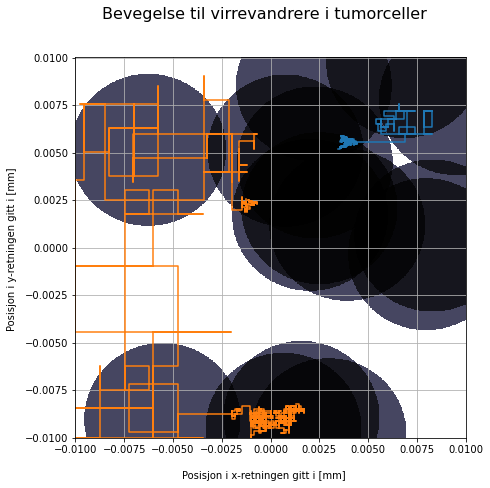

In [25]:
M = 1000 #antall tidssteg
N = 2 #antall virrevandrere
m = 15 # Antall tumorer
L = 0.02 #mm
areal_tumor = np.pi * dx ** 2
x_koord = np.linspace(-L/2, L/2, M) 
y_koord = np.linspace(-L/2, L/2, M)

#velger et tilfeldig punkt i arraysene med x- og y-koordinater. Dette gjøres m-ganger, der m er antall tumorer:
posisjon_tumorer = [np.array([np.random.choice(x_koord), np.random.choice(y_koord)]) for i in range(m)]
#array med tumorkoeffisienter:
t_k = np.ones(m)*0.1

#kaller funksjonene
tumorer_kart = tumorceller(x_koord, y_koord, areal_tumor, posisjon_tumorer, t_k) #lager kreftceller

#setter virrevandreren inn i vevet som inneholder tumorceller
posisjon_virrevandrer = virrevandrer_bevegelse_med_grensebetingelser(M, x_koord, N, tumorer_kart) 
                                                          
#plotter
plot_virrevandring2D(x_koord, y_koord, posisjon_virrevandrer, tumorer_kart)

In [17]:
#Oppgave e)

'''''

Koden "Intensitet" implementerer ligning (12) i prosjektheftet. Funksjonen tar inn en 3D-matrise (en såkalt tensor) 
med data om N virrevandrere, med M tidssteg, samt grensene til området som skal anaylseres, og antall ruter 
n_x og n_y. Funksjonen returner blant annet det normaliserte histogrammet i 2 dimensjoner.

'''''

def Intensitet(tensor,x_min,x_max,y_min,y_max,n_x,n_y):
    x = np.concatenate(tensor[:,0],axis=None) #setter sammen bevegelsen til alle virrevandrere i x-retning
    y = np.concatenate(tensor[:,1],axis=None) #setter sammen bevegelsen til alle virrevandrere i y-retning
    
    x_arr,y_arr = np.linspace(x_min, x_max, n_x+1),np.linspace(y_min, y_max, n_y+1) #lager en array for bins
    hist2d = np.histogram2d(x, y, bins=(x_arr,y_arr))[0] #lager 2d histogrammet ved hjelp av numpy
    
    normalisert_hist2D = hist2d.T/np.sum(hist2d) #normaliserer til slutt intensiteten
    
    return x_arr, y_arr, normalisert_hist2D 

Vi skal nå gjøre en simulering i et system med $10 < m < 25$ tumorer, der $t_k$ er tilfeldig valgte innenfor intervallet $(0.3, 0.45)$. Vi bestemte oss for å ha $N=20$ virrevandrere, der $M=1000$ tilsvarer tidsstegene for hver virrevandrer. I tillegg til det har vi en oppløsning på 750, noe som er representativt for et MRI-scan. Vi bestemte oss for å undersøke et vev på $0.01*0.01mm^2$. $n_x$ og $n_y$ har blitt satt opp på 40. 

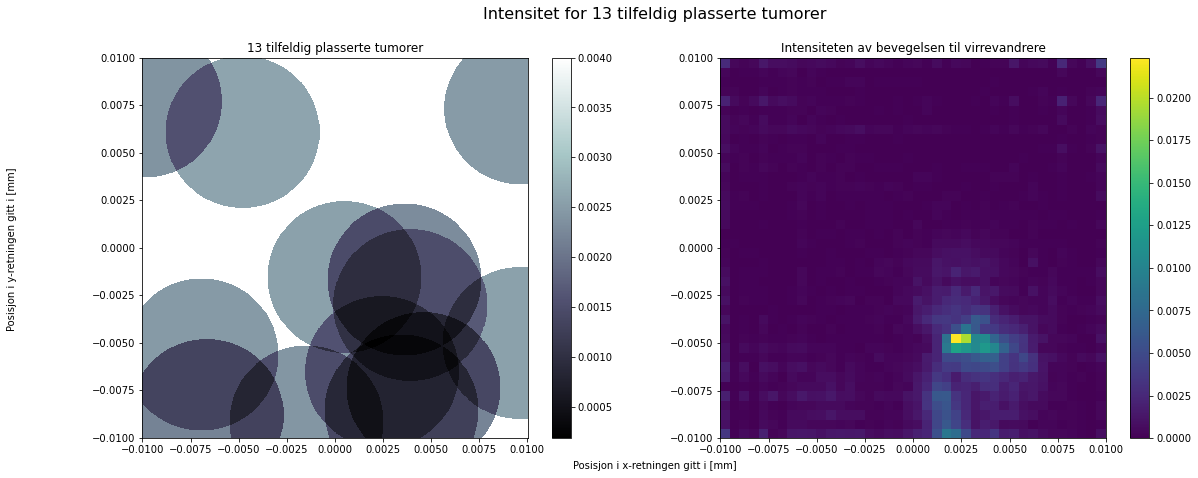

In [30]:
#Oppgave f)

M = 1000 #antall tidssteg for virrevandreren
N = 30 #antall virrevandrere
oppløsning = 750 #sier om hvor god oppløsningen skal være, jo høyere oppløsn. desto lengre blir kjøretida. til koden
m = np.random.randint(11, 25) #tilfeldig antall tumorer. 10 < m < 25
x_min, x_max = -0.01, 0.01 #grenser til det undersøkte området
y_min, y_max = -0.01, 0.01

areal_tumor = np.pi * dx ** 2 #arealet til tumorene
x_koord = np.linspace(x_min, x_max, oppløsning) #koordinater som brukes av funksjonene
y_koord = np.linspace(y_min, y_max, oppløsning)

#velger et tilfeldig punkt i arraysene med x- og y-koordinater. Dette gjøres m-ganger, der m er antall tumorer:
pos_tumorer = [np.array([np.random.choice(x_koord), np.random.choice(y_koord)]) for i in range(m)]
t_k = [np.random.uniform(0.3, 0.45) for i in range(m)] #lager en tilfeldigvis sekvens med t_k mellom 0.3 og 0.45
n_x, n_y = 40, 40 #bins som brukes for å lage histogrammet

#kaller funksjonene:
#delen av plottingen for tumorer og virrevandring
tumorer_kart = tumorceller(x_koord, y_koord, areal_tumor, pos_tumorer, t_k)
posisjon_virrevandrer = virrevandrer_bevegelse_med_grensebetingelser(M, x_koord, N, tumorer_kart)

#delen av plottingen for intensiteten av bevegelsen til virrevandreren
x_intensitet, y_intensitet, intensitet = Intensitet(posisjon_virrevandrer, x_min, x_max, y_min, y_max, n_x, n_y)
x_grid, y_grid = np.meshgrid(x_intensitet, y_intensitet)

#plotter
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19,7))

im = ax[0].pcolormesh(x_koord, y_koord, tumorer_kart, shading='auto', cmap='bone')
fig.colorbar(im, ax=ax[0])
ax[0].set_title(f'{m} tilfeldig plasserte tumorer')

im = ax[1].pcolormesh(x_grid, y_grid, intensitet, shading='auto')
fig.colorbar(im, ax=ax[1])
ax[1].set_title("Intensiteten av bevegelsen til virrevandrere")

fig.suptitle(f'Intensitet for {m} tilfeldig plasserte tumorer', fontsize=16)
fig.text(0.5, 0.07, f'Posisjon i x-retningen gitt i [{dx_enhet}]', ha='center', va='center')
fig.text(0.03, 0.5, f'Posisjon i y-retningen gitt i [{dx_enhet}]', ha='center', va='center', rotation='vertical')
plt.show()

Vi ser at funksjonen til intesiteten $I(i,j)$ gjør det lettere å kunne se hvor virrevandrerne har oftest vært i vevet. Dette gjør det lettere å finne stedene der to eller flere tumorcellene overlapper siden det blir vanskeligere for virrevandreren til å bevege seg. Dette kan også tilsvare virkeligheten og dermed ha en praktisk betydning siden et MRI-scan viser oss rutene der vannmolekylene har befunnet seg mest i. 

Likevel er det noen problemer når man bare ser på intensiteten. Fra simuleringen over ser vi at enkelte kreftceller ikke blir fremhevet i plottingen av intensitetsfunksjonen. Intesiteten uten et filter kan være nyttig dersom man skal undersøke om et vev inneholder kreftceller eller ikke, men det kan hende at enkelte kreftceller ikke blir oppdaget. Et annet mulig resultat er at funksjonen diagnostiserer friske celler som kreftceller, noe som kan for eksempel skje dersom flere virrevandrere starter eller ender i samme punkt. En slik situasjon, der virrevandrerne starter på samme sted, kan neglisjeres i vår kode. Grunnen til det er at startpunktene til hver virrevandrer er valgt på en tilfeldig måte. Det er altså lite sannsynlig at virrevandrende vannmolekyler starter på samme sted.

De to problemene nevnt ovenfor kan få større betydning dersom en skal undersøke et større område, la oss si et scan av hele hjernen, der forekomsten av tumorceller minker jo større det undersøkte arealet blir. Figuren under viser nøyaktig det problemet.

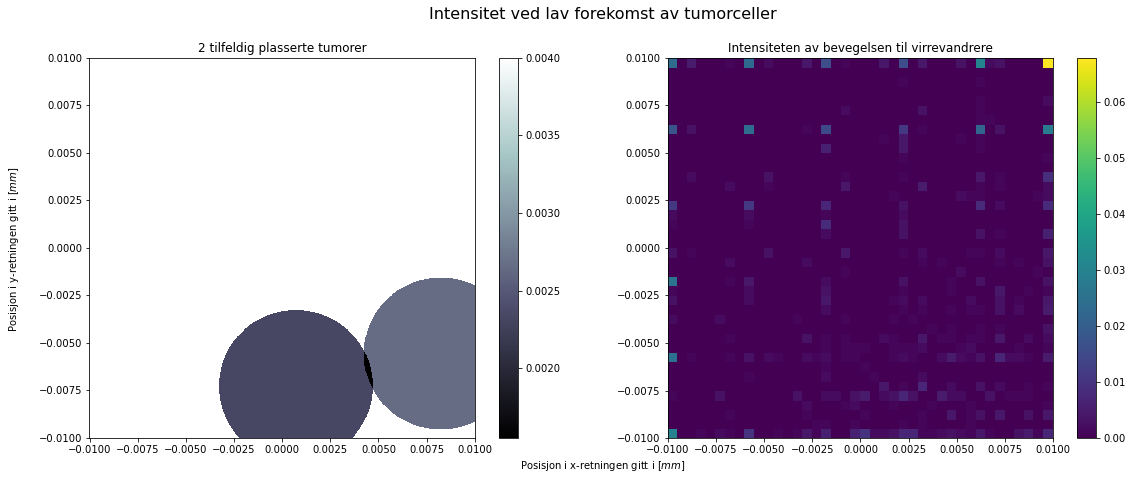

In [19]:
antall_tidssteg = 100 #antall tidssteg for virrevandreren, M
antall_virrevandrere = 10 #antall virrevandrere, N
Oppløsning = 750 #sier om hvor god oppløsningen skal være, jo høyere oppløsn. desto lengre blir kjøretida. til koden
antall_tumorer = 2 #færre tumorer per areal

x_koord1 = np.linspace(x_min, x_max, Oppløsning) #koordinater som brukes av funksjonene
y_koord1 = np.linspace(y_min, y_max, Oppløsning)

#velger et tilfeldig punkt i arraysene med x- og y-koordinater. Dette gjøres m-ganger, der m er antall tumorer:
pos_tumorer1 = [np.array([np.random.choice(x_koord), np.random.choice(y_koord)]) for i in range(2)]
t_k1 = [np.random.uniform(0.3, 0.45) for i in range(2)] #lager en tilfeldigvis sekvens med t_k mellom 0.3 og 0.45
n_x1, n_y1 = 40, 40 #bins som brukes for å lage histogrammet

#kaller funksjonene:
#delen av plottingen for tumorer og virrevandring
tumorer_kart1 = tumorceller(x_koord1, y_koord1, areal_tumor, pos_tumorer1, t_k1)
posisjon_virrevandrer1 = virrevandrer_bevegelse_med_grensebetingelser(antall_tidssteg, x_koord1, 
                                                                      antall_virrevandrere, tumorer_kart1)

#delen av plottingen for intensiteten av bevegelsen til virrevandreren
x_intensitet1, y_intensitet1, intensitet1 = Intensitet(posisjon_virrevandrer1, x_min, x_max, y_min, y_max, n_x, n_y)
x_grid1, y_grid1 = np.meshgrid(x_intensitet1, y_intensitet1)

#plotter
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19,7))

im = ax[0].pcolormesh(x_koord1, y_koord1, tumorer_kart1, shading='auto', cmap='bone')
fig.colorbar(im, ax=ax[0])
ax[0].set_title(f'{2} tilfeldig plasserte tumorer')

im = ax[1].pcolormesh(x_grid1, y_grid1, intensitet1, shading='auto')
fig.colorbar(im, ax=ax[1])
ax[1].set_title("Intensiteten av bevegelsen til virrevandrere")

fig.suptitle('Intensitet ved lav forekomst av tumorceller', fontsize=16)
fig.text(0.5, 0.07, fr'Posisjon i x-retningen gitt i [${dx_enhet}$]', ha='center', va='center')
fig.text(0.07, 0.5, fr'Posisjon i y-retningen gitt i [${dx_enhet}$]', ha='center', va='center', rotation='vertical')
plt.show()

I figurene over ser vi at det noen ganger kan skje en feildiagnostisering av tumorceller.

Vi kan imidlertid fikse dette problemet ved hjelp av et filter, som gjør kontrasten mellom friskt vev og vev som inneholder tumorceller mer tydelig på plottingen. 

I neste deloppgaven bruker vi et såkalt Sobel-filter. Filteret gjør kontrasten mellom friskt vev og vev som inneholder tumorceller mer tydelig på plottingen. 

In [31]:
#Oppgave g)

'''''

I denne oppgaven skal vi bruke en såkalt Sobel-filter. Vi bestemte oss å implementere algoritmen (Algoritme 2) 
som ble foreslått i prosjektheftet.

'''''

def sobel_filter(A_lokal): 
    n, m = len(A_lokal[0]), len(A_lokal) #n=antall kolonner, m=antall rader
    X, Y, S = np.zeros((n-2,m-2)), np.zeros((n-2,m-2)), np.zeros((n-2,m-2)) #lager en nxm matrise med nullere 
    
    g_x = np.array([[1,0,-1], #g_x definert i prosjektheftet
                [2,0,-2],
                [1,0,-1]])
    g_y = g_x.T #matrisen g_y er den samme som matrisen g_x transponert
    
    #vi følger videre med oppskriften for algoritmen
    for i in range(2,n-1):
        for j in range(2,m-1):
            lokalePiksler = A_lokal[i-1:i+2,j-1:j+2]
            X[i-1][j-1] = np.sum(g_x*lokalePiksler)
            Y[i-1][j-1] = np.sum(g_y*lokalePiksler)
            S[i-1][j-1] = np.sqrt(X[i-1][j-1]**2 +Y[i-1][j-1]**2) 
    
    #normaliserer X, Y, og S
    norm_X, norm_Y, norm_S = np.linalg.norm(X, 1), np.linalg.norm(Y, 1), np.linalg.norm(S, 1)
    X, Y, S = X/norm_X, Y/norm_Y, S/norm_S
    
    return X, Y, S

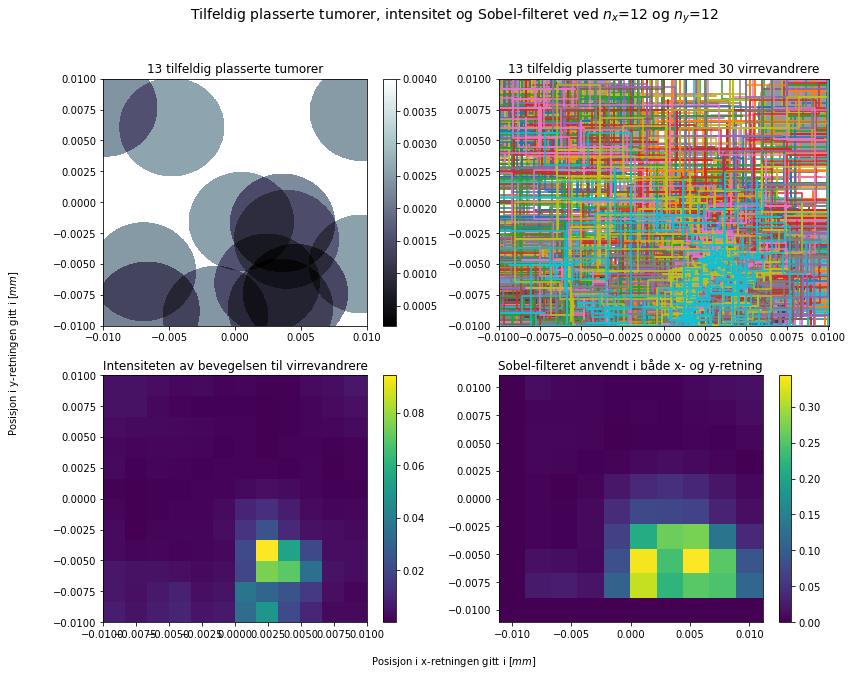

In [32]:
#Oppgave h)

'''''

Vi gjenbruker verdiene fra den første simulasjonen i oppgave f).

'''''

n_x, n_y = 12, 12 #lavt antall bins

x_min, x_max = -0.01, 0.01 #grenser til det undersøkte området
y_min, y_max = -0.01, 0.01
x1 = np.linspace(x_min, x_max, n_x-2) #lager aksene for plottingen til Sobel-filteret
y1 = np.linspace(y_min, y_max, n_y-2)

#kaller funksjonene
x_intensitet, y_intensitet, intensitet = Intensitet(posisjon_virrevandrer, x_min, x_max, y_min, y_max, n_x, n_y)
X, Y, S = sobel_filter(intensitet)

#lager koordinatsystemet for intensitetsplotten
x_grid, y_grid = np.meshgrid(x_intensitet, y_intensitet)

#plotter
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13,10))

im = ax[0][0].pcolormesh(x_koord, y_koord, tumorer_kart,shading='auto',cmap='bone')
fig.colorbar(im, ax=ax[0][0])
ax[0][0].set_title(f'{m} tilfeldig plasserte tumorer') #NB: antall tumorer endres med hver simulering!

ax[0][1].pcolormesh(x_koord, y_koord, tumorer_kart,shading='auto',cmap='bone')
#for-løkken under muliggjør simulasjonen for flere virrevandrere virrevandere
for i in range (len(posisjon_virrevandrer)):
    ax[0][1].plot(posisjon_virrevandrer[i][0],posisjon_virrevandrer[i][1])

ax[0][1].set_title(f'{m} tilfeldig plasserte tumorer med {N} virrevandrere') #tittel på plotten

im = ax[1][0].pcolormesh(x_grid, y_grid, intensitet, shading='auto')
fig.colorbar(im, ax=ax[1][0])
ax[1][0].set_title("Intensiteten av bevegelsen til virrevandrere") #tittel på plotten

im = ax[1][1].pcolormesh(x1, y1, S, shading='auto')
fig.colorbar(im, ax=ax[1][1])
ax[1][1].set_title('Sobel-filteret anvendt i både x- og y-retning') #tittel på plotten

fig.suptitle(fr'Tilfeldig plasserte tumorer, intensitet og Sobel-filteret ved $n_x$={n_x} og $n_y$={n_y}', fontsize=14)
fig.text(0.5, 0.07, fr'Posisjon i x-retningen gitt i [${dx_enhet}$]', ha='center', va='center') #aksenavn
fig.text(0.03, 0.5, fr'Posisjon i y-retningen gitt i [${dx_enhet}$]', ha='center', va='center', rotation='vertical')
plt.show()

Som vi ser fra de to siste figurene over (intensiteten og Sobel-filteret), er oppløsningen på bildet veldig lavt, slik at vi egentlig bare ser på store piksler. Imidlertid virker det som om Sobel-filteret gir oss et bedre bildet enn intensiteten alene. Grunnen for den dårlige oppløsningen kan skyldes på det lave antallet på bins ($n_x$ og $n_y$). Vi da kan skru opp antallet til $n_x = n_y = 1000$ og se hva som kommer til skje. Et veldig stort antall på bins burde logisk sett gi oss et skarpere bilde.

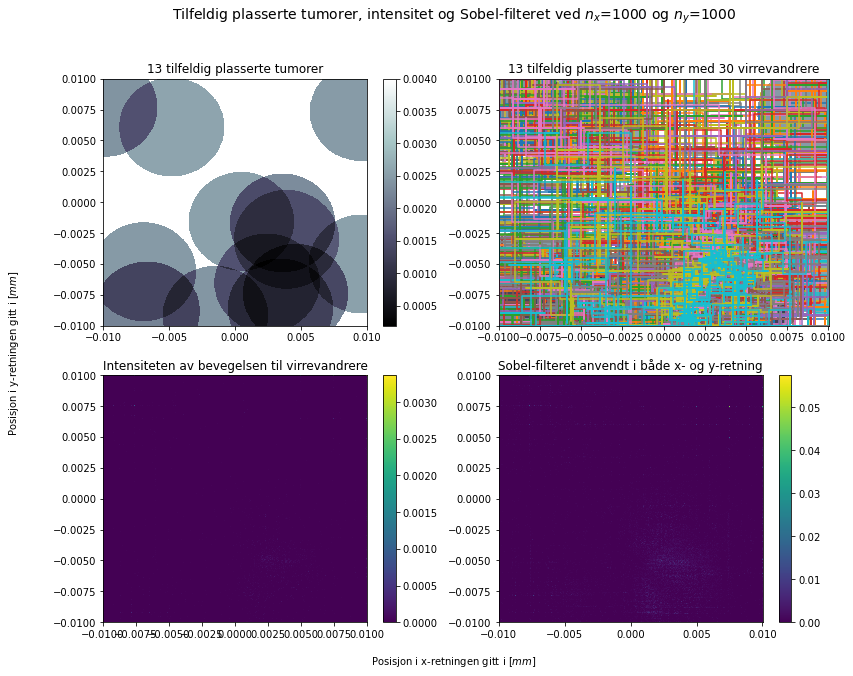

In [33]:
n_x, n_y = 1000, 1000 #veldig høyt antall bins

x1 = np.linspace(x_min, x_max, n_x-2) #lager aksene for plottingen til Sobel-filteret
y1 = np.linspace(y_min, y_max, n_y-2)

#kaller funksjonene
x_intensitet, y_intensitet, intensitet = Intensitet(posisjon_virrevandrer, x_min, x_max, y_min, y_max, n_x, n_y)
X, Y, S = sobel_filter(intensitet)

#lager koordinatsystemet for intensitetsplotten
x_grid, y_grid = np.meshgrid(x_intensitet, y_intensitet)

#plotter
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13,10))

im = ax[0][0].pcolormesh(x_koord, y_koord, tumorer_kart,shading='auto',cmap='bone')
fig.colorbar(im, ax=ax[0][0])
ax[0][0].set_title(f'{m} tilfeldig plasserte tumorer') #NB: antall tumorer endres med hver simulering!

ax[0][1].pcolormesh(x_koord, y_koord, tumorer_kart,shading='auto',cmap='bone')
#for-løkken under muliggjør simulasjonen for flere virrevandrere virrevandere
for i in range (len(posisjon_virrevandrer)):
    ax[0][1].plot(posisjon_virrevandrer[i][0],posisjon_virrevandrer[i][1])

ax[0][1].set_title(f'{m} tilfeldig plasserte tumorer med {N} virrevandrere') #tittel på plotten

im = ax[1][0].pcolormesh(x_grid, y_grid, intensitet, shading='auto')
fig.colorbar(im, ax=ax[1][0])
ax[1][0].set_title("Intensiteten av bevegelsen til virrevandrere") #tittel på plotten

im = ax[1][1].pcolormesh(x1, y1, S, shading='auto')
fig.colorbar(im, ax=ax[1][1])
ax[1][1].set_title('Sobel-filteret anvendt i både x- og y-retning') #tittel på plotten

fig.suptitle(fr'Tilfeldig plasserte tumorer, intensitet og Sobel-filteret ved $n_x$={n_x} og $n_y$={n_y}', fontsize=14)
fig.text(0.5, 0.07, fr'Posisjon i x-retningen gitt i [${dx_enhet}$]', ha='center', va='center') #aksenavn
fig.text(0.03, 0.5, fr'Posisjon i y-retningen gitt i [${dx_enhet}$]', ha='center', va='center', rotation='vertical')
plt.show()

Nå kan vi ikke konkludere noe som helst fra de to siste plottene. Hvis vi kunne konkludere med at vevet inneholdt tumorceller i den forrige simuleringen, kan vi ikke se noe som helst i figurene over. For høy $n$ fører altså til at intensiteten i bildet, altså hvor mange ofte virrevandreren har befunnet seg i en rute, blir mindre med antall bins. Vi må altså ha en mindre $n$.

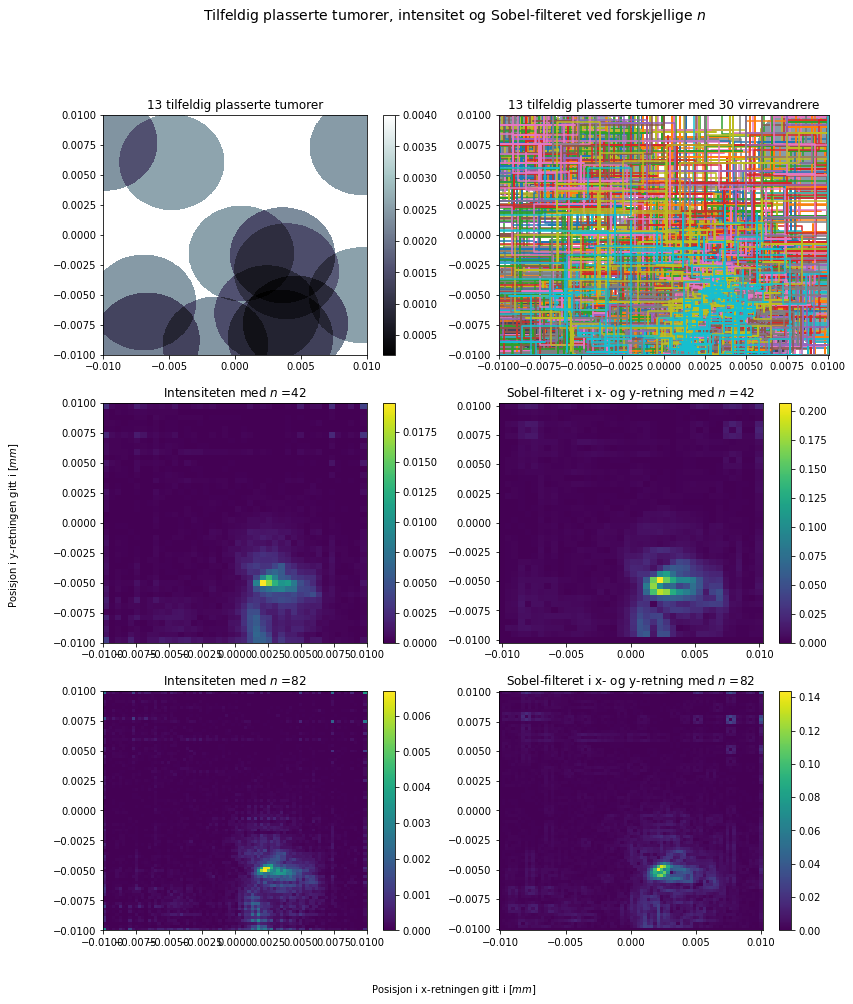

In [34]:
'''''

Her sammenligner vi forskjellige antall på bins (n).

'''''

n_x, n_y = 82, 82 #lavere antall bins enn i forrige eksemplet
n_x1, n_y1 = 42, 42

x1 = np.linspace(x_min, x_max, n_x-2) #lager aksene for plottingen til Sobel-filteret
y1 = np.linspace(y_min, y_max, n_y-2)

x11 = np.linspace(x_min, x_max, n_x1-2) #lager et til set med akser for å sammenligne forskjellige bins
y11 = np.linspace(x_min, x_max, n_y1-2)

#kaller funksjonene
#for n=82:
x_intensitet, y_intensitet, intensitet = Intensitet(posisjon_virrevandrer, x_min, x_max, y_min, y_max, n_x, n_y)
X, Y, S = sobel_filter(intensitet)

#for n=42:
x_intensitet1, y_intensitet1, intensitet1 = Intensitet(posisjon_virrevandrer, x_min, x_max, y_min, y_max, n_x1, n_y1)
X1, Y1, S1 = sobel_filter(intensitet1)

#lager koordinatsystemet for intensitetsplotten
x_grid, y_grid = np.meshgrid(x_intensitet, y_intensitet) #for n=82
x_grid1, y_grid1 = np.meshgrid(x_intensitet1, y_intensitet1) #for n=42

#plotter
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(13,15))

im = ax[0][0].pcolormesh(x_koord, y_koord, tumorer_kart,shading='auto',cmap='bone')
fig.colorbar(im, ax=ax[0][0])
ax[0][0].set_title(f'{m} tilfeldig plasserte tumorer') #NB: antall tumorer endres med hver simulering!

ax[0][1].pcolormesh(x_koord, y_koord, tumorer_kart,shading='auto',cmap='bone')
#for-løkken under muliggjør simulasjonen for flere virrevandrere virrevandere
for i in range (len(posisjon_virrevandrer)):
    ax[0][1].plot(posisjon_virrevandrer[i][0],posisjon_virrevandrer[i][1])
ax[0][1].set_title(f'{m} tilfeldig plasserte tumorer med {N} virrevandrere') #tittel på plotten

im = ax[1][0].pcolormesh(x_grid1, y_grid1, intensitet1, shading='auto')
fig.colorbar(im, ax=ax[1][0])
ax[1][0].set_title(fr'Intensiteten med $n$ ={n_x1}') #tittel på plotten

im = ax[1][1].pcolormesh(x11, y11, S1, shading='auto')
fig.colorbar(im, ax= ax[1][1])
ax[1][1].set_title(fr'Sobel-filteret i x- og y-retning med $n$ ={n_x1}') #tittel på plotten

im = ax[2][0].pcolormesh(x_grid, y_grid, intensitet, shading='auto')
fig.colorbar(im, ax=ax[2][0])
ax[2][0].set_title(fr'Intensiteten med $n$ ={n_x}') #tittel på plotten

im = ax[2][1].pcolormesh(x1, y1, S, shading='auto')
fig.colorbar(im, ax=ax[2][1])
ax[2][1].set_title(fr'Sobel-filteret i x- og y-retning med $n$ ={n_x}') #tittel på plotten

fig.suptitle(fr'Tilfeldig plasserte tumorer, intensitet og Sobel-filteret ved forskjellige $n$', fontsize=14)
fig.text(0.5, 0.07, fr'Posisjon i x-retningen gitt i [${dx_enhet}$]', ha='center', va='center') #aksenavn
fig.text(0.03, 0.5, fr'Posisjon i y-retningen gitt i [${dx_enhet}$]', ha='center', va='center', rotation='vertical')
plt.show()

Figuren over viser akkurat samme situasjon som de to forrige figurene, men bare med mindre antall bins. Vi ser at dersom vi velger en $n \in (42,102)$, blir det mye enklere å skille mellom enkelte tumorceller og tumorceller som ligger oppå hverandre. I simulasjonene over er det etter vår mening enklere å skille tumorene fra hverandre når $n = 82$. Sobel-filteret gir oss et mer detaljert og tydelig bilde med større kontrast mellom friskt vev og vev som inneholder kreftceller. Vi får nå en bedre forståelse over hvor tumorcellene befinner seg i hvert tilfeldig generert vev med tumorceller. 

## Konklusjon
I dette prosjektet har vi studert hvordan et MRI-scan fungerer. Vi har startet å undersøke bevegelsen til en enkel endimensjonal virrevandrer. Etterhvert utvidet vi koden slik at den kunne simulere bevegelsen til en todimensjonal virrevandrer. Vi satt virrevandreren i vev som inneholdt tumorceller, noe som kan sammenlignes med virrevandringen av vannmolekyler i vev med kreftceller. Til slutt undersøkte vi bevegelsen til vannmolekyler ved hjelp av intensitetsfunksjonen og Sobel-filteret. Vi kunne konkludere med at Sobel-filteret gjorde det enklere å undersøke vev med tumorceller. Vi lærte ved hjelp av prosjektet hvor vanskelig det egentlig er å finne tumorceller i kroppen.

Vi ønsker likevel å understreke at simuleringen over er en sterkt forenklet versjon av et MRI-scan, og dermed ikke tilsvarer helt virkeligheten. Implementasjonen av prosjektet manglet naturligvis et ytre magnetfelt som kunne påvirket bevegelsen av vannmolekylene i vevet. Som kjent har vannmolekyler en magnetisk fase. I ekte MR-scan manipuleres denne fasen ved bruk av eksterne magnetfelt, noe som gir oss et mer komplett bilde av hele vevet.

## Referanser
[1] https://numpy.org/

[2] https://scipy.org/

[3] Svein Linge og Hans Petter Langtangen, "Programming for computations" (2019).

[4] Niels Henrik Aase og Kathrine Røe Redalen, "TMA4320 vår 2023 - Biofysikkprosjekt" (2023).